In [1]:
import layoutparser as lp
import layoutparser.ocr as ocr
import matplotlib.pyplot as plt
from matplotlib import figure
import cv2
from pdf2image import convert_from_bytes, convert_from_path
import numpy as np
from os import path
from PIL import Image
from PIL import ImageFont, ImageDraw

In [2]:
ocr_agent = ocr.TesseractAgent()

In [3]:
images = convert_from_bytes(open('Injection_Molding_Design_Guidelines_2017.pdf', 'rb').read())

In [4]:
images

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7D223F10>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7D223CA0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7D223B20>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7CAB8E50>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7CAB8E80>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7CAB8EB0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7CAB8EE0>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1700x2200 at 0xFFFF7CAB8F10>]

In [5]:
import numpy as np

In [6]:
lp.is_detectron2_available()

True

In [7]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

/home/ubuntu/miniforge3/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


/home/ubuntu/miniforge3/lib/python3.9/site-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /root/pytorch/aten/src/ATen/native/TensorShape.cpp:2227.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


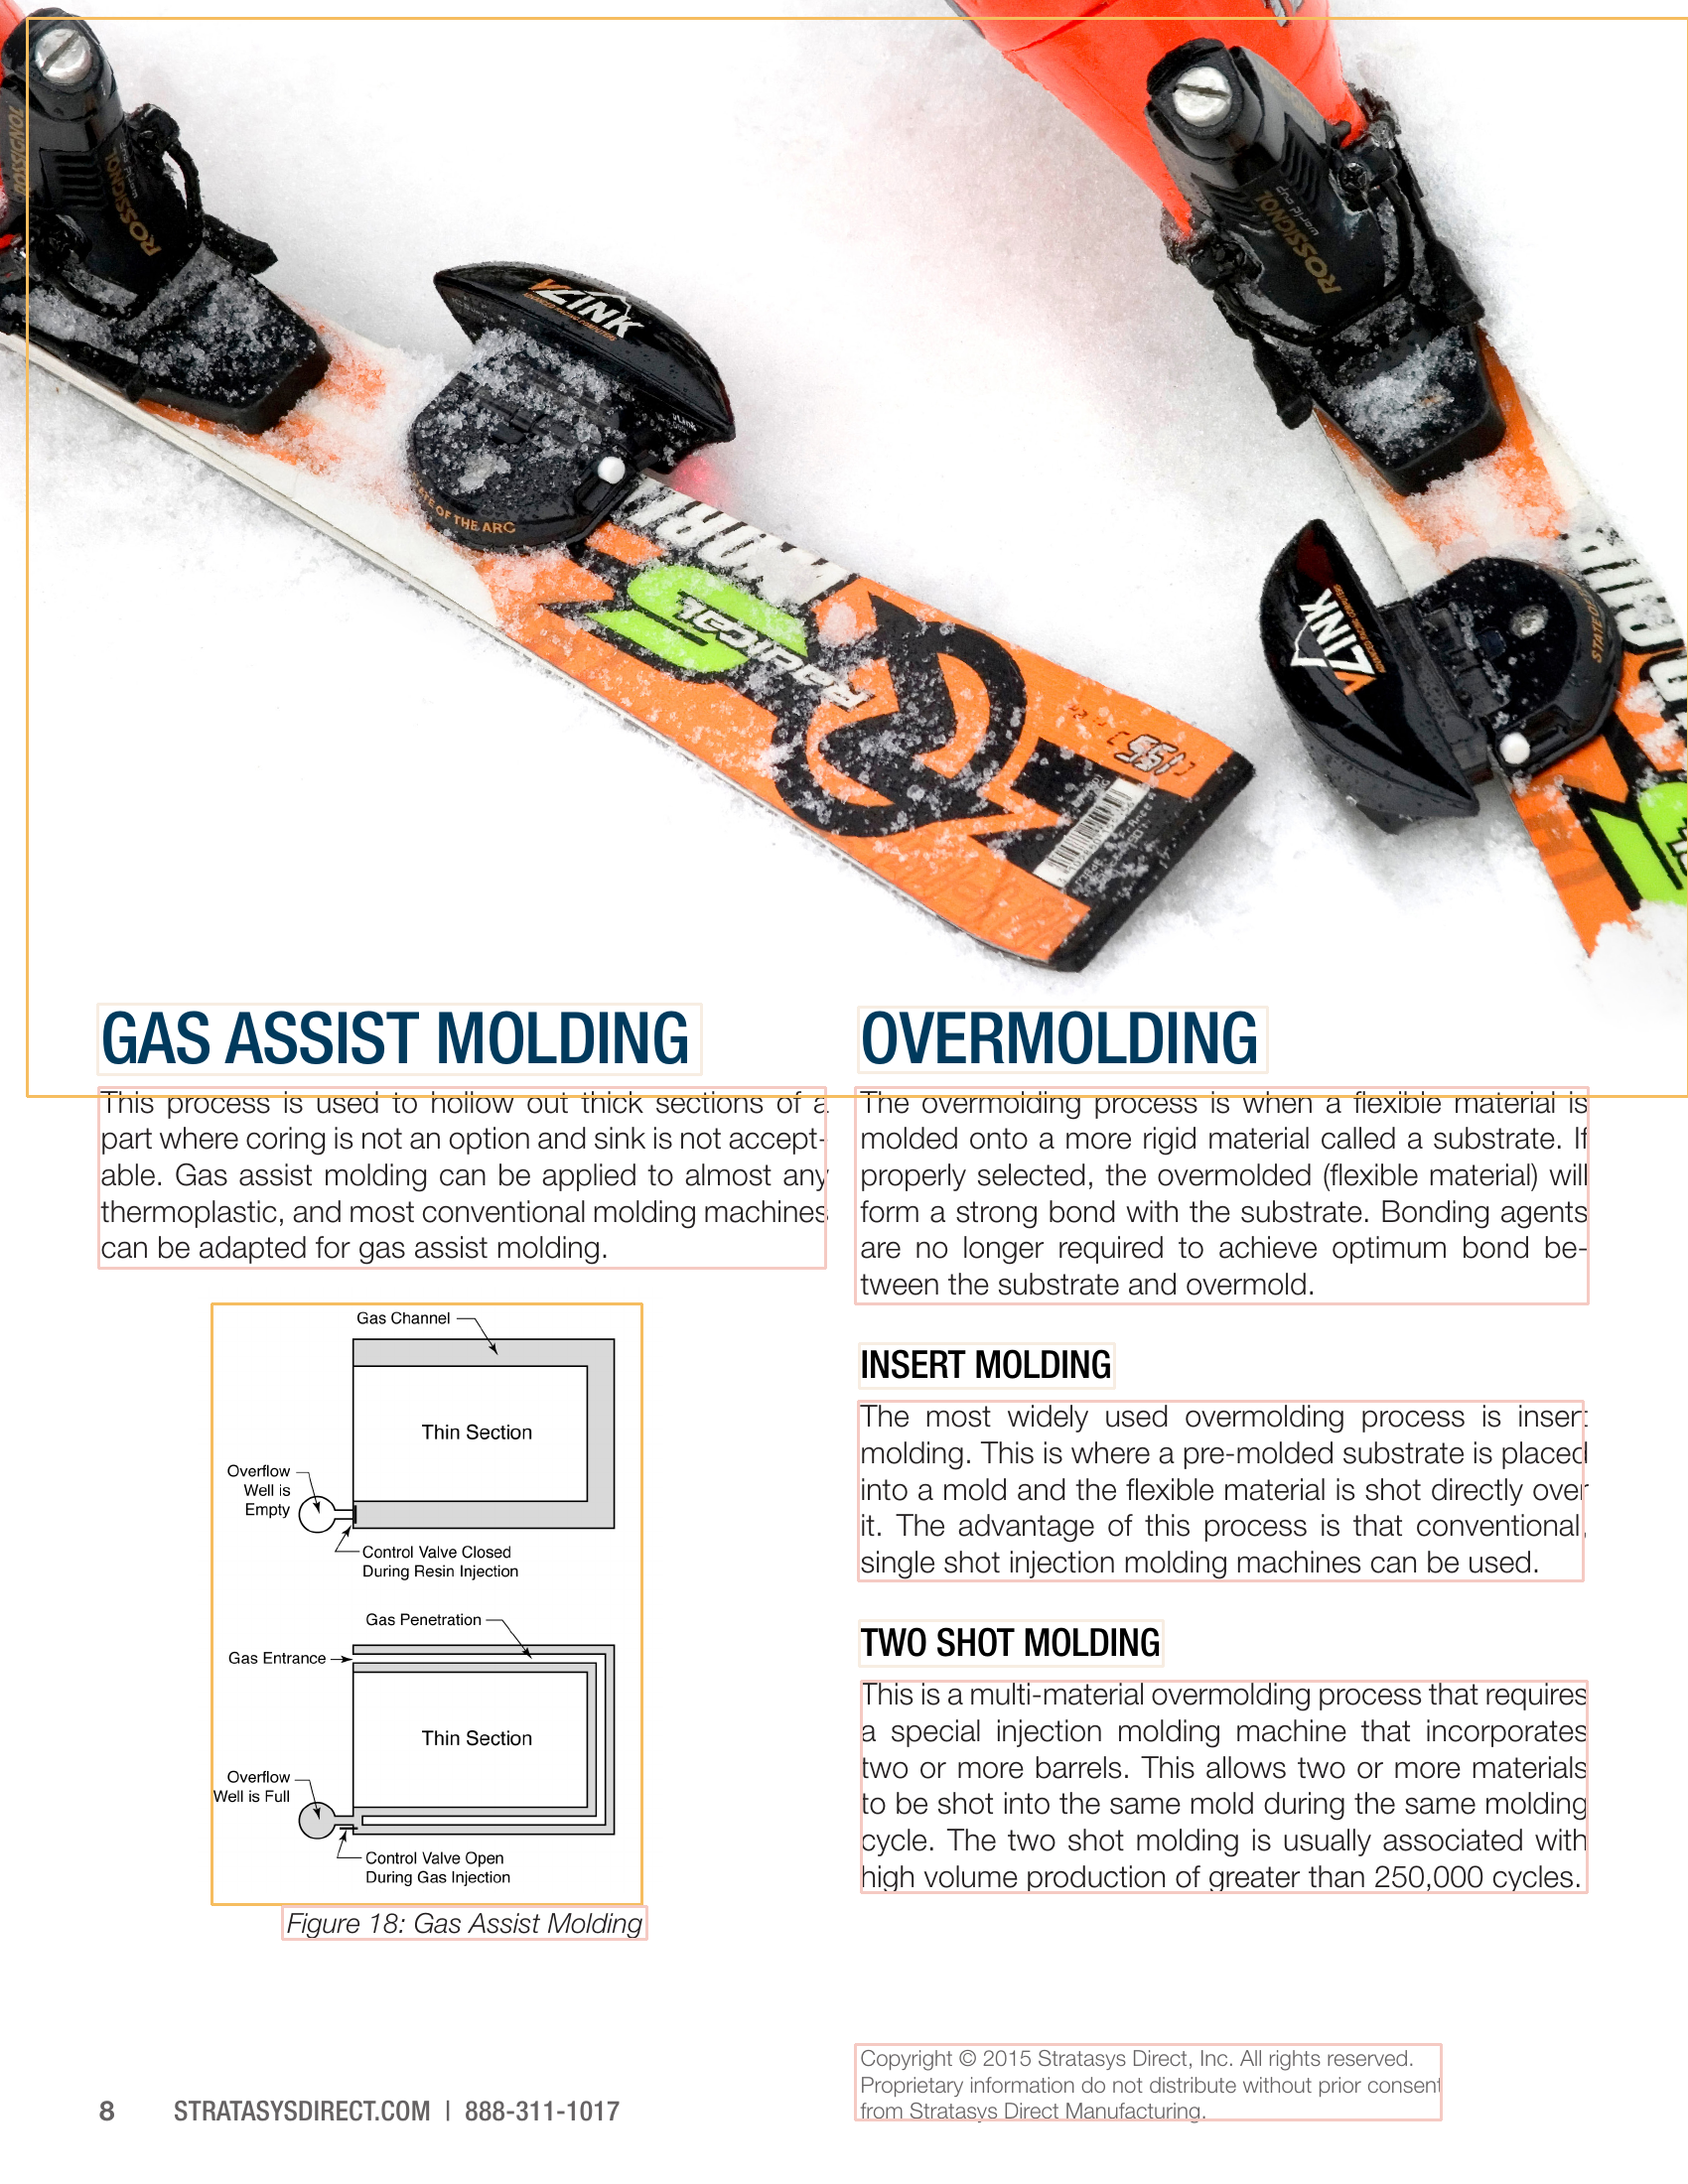

In [8]:
for image in images:
    ocr_agent = ocr.TesseractAgent()
    
    image = np.array(image)
    
    layout = model.detect(image)
lp.draw_box(image, layout, box_width=3)

In [9]:
type(layout)

layoutparser.elements.layout.Layout

In [18]:
blocks = lp.Layout([b for b in layout if b.type == 'Title'])

In [19]:
blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=865.0103759765625, y_1=1632.2774658203125, x_2=1171.3212890625, y_2=1678.1038818359375), text=None, id=None, type=Title, parent=None, next=None, score=0.9979488253593445), TextBlock(block=Rectangle(x_1=865.07373046875, y_1=1353.4969482421875, x_2=1122.1370849609375, y_2=1398.0140380859375), text=None, id=None, type=Title, parent=None, next=None, score=0.9975571632385254), TextBlock(block=Rectangle(x_1=98.97083282470703, y_1=1011.3444213867188, x_2=706.8370971679688, y_2=1082.3927001953125), text=None, id=None, type=Title, parent=None, next=None, score=0.9952735304832458), TextBlock(block=Rectangle(x_1=864.1569213867188, y_1=1014.5884399414062, x_2=1276.015869140625, y_2=1080.610595703125), text=None, id=None, type=Title, parent=None, next=None, score=0.9630433320999146)], page_data={})